# Gapminder Exploration & Visualization


The late, magnificent Hans Rosling first entered the zeitgeist with his widely watched TED talk (https://www.youtube.com/watch?v=hVimVzgtD6w), which brought to life his organization Gapminder's data. Here, I walk through an exploratory analysis of the Gapminder 2007 global development data, including summary statistics, box and violin plots, histograms, heatmaps, and high level observations and recreate Rosling's colorful multivariate bubble chart using seaborn. In a future post, I'll recreate Rosling's animated time-series bubble plot using plotly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
df = pd.read_csv(body)

In [4]:
# Check the first few rows of the dataset to get a feel for it. Countries are listed in alphabetical order. 
df.head()

,Unnamed: 0,country,year,population,continent,life_exp,gdp_cap
0,11,Afghanistan,2007,31889923,Asia,43.828,974.580338
1,23,Albania,2007,3600523,Europe,76.423,5937.029526
2,35,Algeria,2007,33333216,Africa,72.301,6223.367465
3,47,Angola,2007,12420476,Africa,42.731,4797.231267
4,59,Argentina,2007,40301927,Americas,75.320,12779.379640


In [5]:
# Check the last few rows of the dataset. 
df.tail()

,Unnamed: 0,country,year,population,continent,life_exp,gdp_cap
137,1655,Vietnam,2007,85262356,Asia,74.249,2441.576404
138,1667,West Bank and Gaza,2007,4018332,Asia,73.422,3025.349798
139,1679,"Yemen, Rep.",2007,22211743,Asia,62.698,2280.769906
140,1691,Zambia,2007,11746035,Africa,42.384,1271.211593
141,1703,Zimbabwe,2007,12311143,Africa,43.487,469.709298


In [6]:
# The dataset includes 142 rows and 7 columns
df.shape

(142, 7)

In [7]:
# Get a sense of the types of objects you're working with (e.g., integers, floats, strings, etc.) 
df.dtypes

Unnamed: 0      int64
country        object
year            int64
population      int64
continent      object
life_exp      float64
gdp_cap       float64
dtype: object

Summary statistics reveal that annual GDP per capita ranges from $277 to $49,547. The mean, $11,680, is greater than the median, $6,124, meaning the distribution is right-skewed with higher-end outliers. 

In [8]:
# Summary statistics of GDP per capita
df["gdp_cap"].describe()

count      142.000000
mean     11680.071820
std      12859.937337
min        277.551859
25%       1624.842248
50%       6124.371109
75%      18008.835640
max      49357.190170
Name: gdp_cap, dtype: float64

Summary statistics reveal that life expectancy ranges from 40 to 80 years. The mean, 67 years, is lower than the median, 72, meaning the distribution is left-skewed with lower-end outliers. 

In [9]:
# Summary statistics of life expectancy. 
df["life_exp"].describe()

count    142.000000
mean      67.007423
std       12.073021
min       39.613000
25%       57.160250
50%       71.935500
75%       76.413250
max       82.603000
Name: life_exp, dtype: float64

In [10]:
# We're going to be creating seaborn plots. Set the style to "darkgrid"
sns.set_style("darkgrid")

A box plot of GDP per capita stratified by continent shows that Europe has the highest median GDP per capita, though it has a wide IQR. Asia has a relatively low GDP per capita, but with a large spread with countries like Singapore and China on the higher end. In Americas, the two outliers represent USA and Canada. 

Text(0, 0.5, 'GDP per Capita [in USD]')

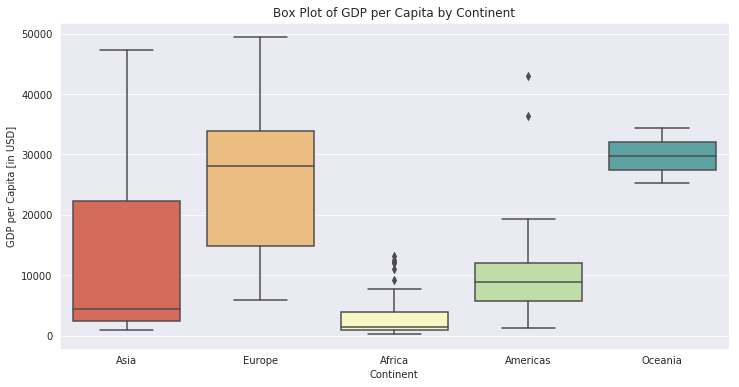

In [26]:
# Box plot of GDP per capita stratified by continent. Remember to set the figure size before you call the plot in order for figsize to work. 

plt.figure(figsize=(12, 6))
sns.boxplot(df.continent, df.gdp_cap, palette = "Spectral")
plt.title("Box Plot of GDP per Capita by Continent")
plt.xlabel("Continent")
plt.ylabel("GDP per Capita [in USD]")

A violin plot of GDP per capita stratified by continent reveals more on the shape of the distribution. Asia, Africa, and the Americas have lower GDP per capita and are heavily right-skewed compared to Europe. 

Text(0, 0.5, 'GDP per Capita [in USD]')

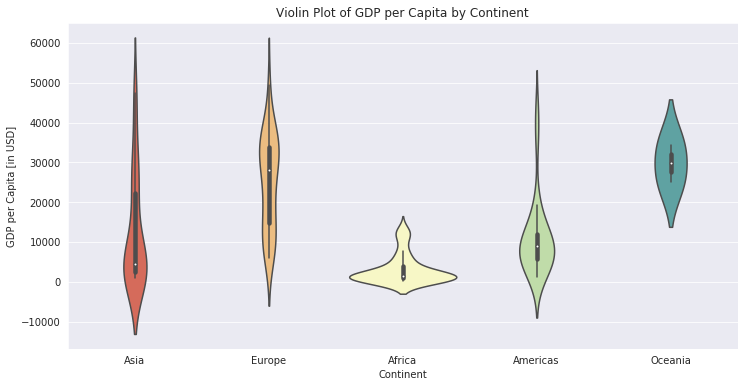

In [25]:
# Violin plot of GDP per capita stratified by continent.

plt.figure(figsize=(12, 6))
sns.violinplot(df.continent, df.gdp_cap, palette = "Spectral")
plt.title("Violin Plot of GDP per Capita by Continent")
plt.xlabel("Continent")
plt.ylabel("GDP per Capita [in USD]")

A histogram illustrates the shape of the distribution of GDP per capita. It's right-skewed with a majority of countries below $20k.

Text(0, 0.5, 'Frequency')

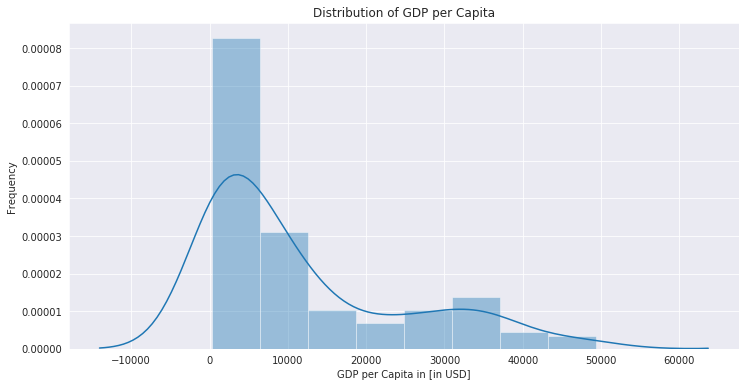

In [13]:
# Histogram of GDP per capita

plt.figure(figsize=(12, 6))
sns.distplot(df.gdp_cap)
plt.title("Distribution of GDP per Capita")
plt.xlabel("GDP per Capita in [in USD]")
plt.ylabel("Frequency")

A histogram illustrates the shape of the distribution of life expectancy. It's left-skewed with a majority of countries above 60. 

Text(0, 0.5, 'Frequency')

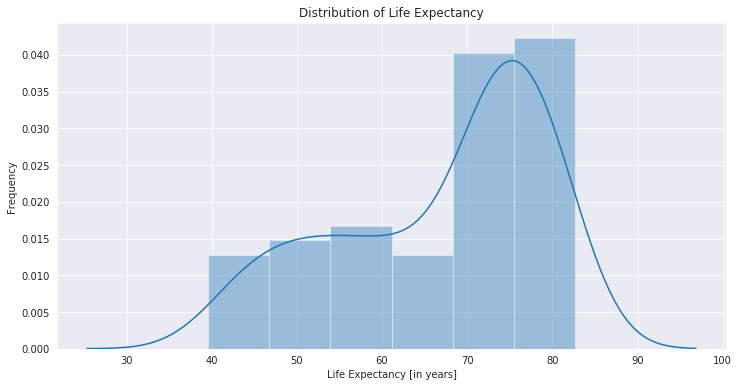

In [14]:
# Histogram of life expectancy

plt.figure(figsize=(12, 6))
sns.distplot(df.life_exp)
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy [in years]")
plt.ylabel("Frequency")

A violin plot of life expectancy stratifed by GDP per capita subgroup illustrates how life expectancy varies among different income groups. Countries in the higher income groups, median life expectancy is higher with a tighter spread. Countries in the lower income brackets have a lower median life expectancy with a wider spread and left skew. 

Text(0, 0.5, 'Life Expectancy [in years]')

<Figure size 864x432 with 0 Axes>

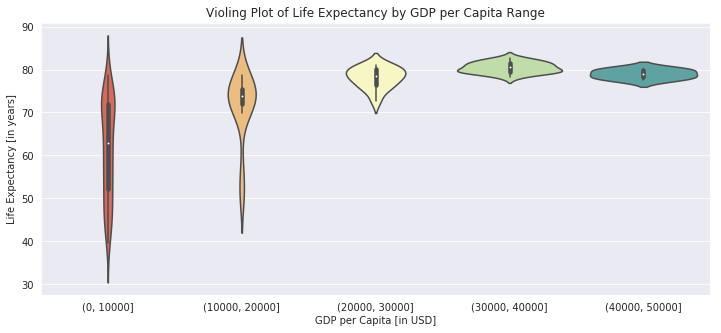

In [24]:
# Violin plot of life expectancy stratified by sub-ranges of GDP per capita

plt.figure(figsize=(12, 6))
df["gdp_group"] = pd.cut(df.gdp_cap, [0, 10000, 20000, 30000, 40000, 50000])
plt.figure(figsize=(12, 5))
sns.violinplot(x="gdp_group", y="life_exp", data=df, palette = "Spectral")
plt.title("Violing Plot of Life Expectancy by GDP per Capita Range")
plt.xlabel("GDP per Capita [in USD]")
plt.ylabel("Life Expectancy [in years]")

A heatmap of correlation between population, life expectancy, and GDP per capita illustrates the moderately strong pearson coefficient of 0.68 between life expectancy and GDP per capita.

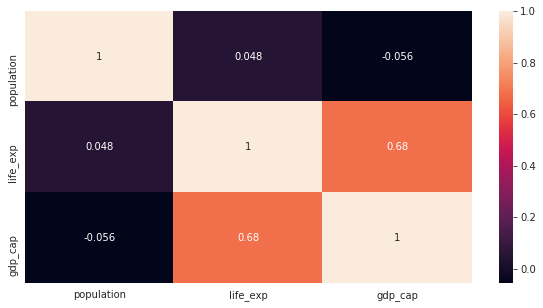

In [16]:
# Heatmap of correlation between population, life expectancy, and GDP per capita

plt.figure(figsize=(10, 5))
df_corr = df.loc[:,["population", "life_exp", "gdp_cap"]]
sns.heatmap(df_corr.corr(), annot=True)

A scatterplot using matplotlib shows countries with higher GDP per capita tending toward higher life expectancy. Since GDP per capita varies geometrically (multiplicatively) rather than arithmetically (additively) between countries, I've used a log scale for the x axis to better visualize the upward trend in life expectancy. 

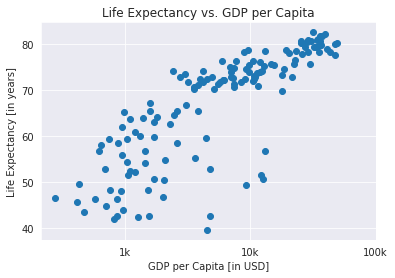

In [17]:
# Scatterplot of life expectancy vs. GDP per capita

plt.scatter(df["gdp_cap"], df["life_exp"])
plt.xlabel("GDP per Capita [in USD]")
plt.ylabel("Life Expectancy [in years]")
plt.title("Life Expectancy vs. GDP per Capita")
plt.xscale("log")
plt.xticks([1000, 10000, 100000], ["1k", "10k", "100k"])
plt.show()

Use seaborn to take the scatter plot of life expectancy vs. GDP per capita to the next level, varying bubble size by population and color by continent. Seaborn is more powerful than matplotlib for customized multi-dimensional plots like this. For example, seaborn automatically color codes the continents by setting the argument hue equal to df["continent"] without needing to create a separate color-based numpy array. 

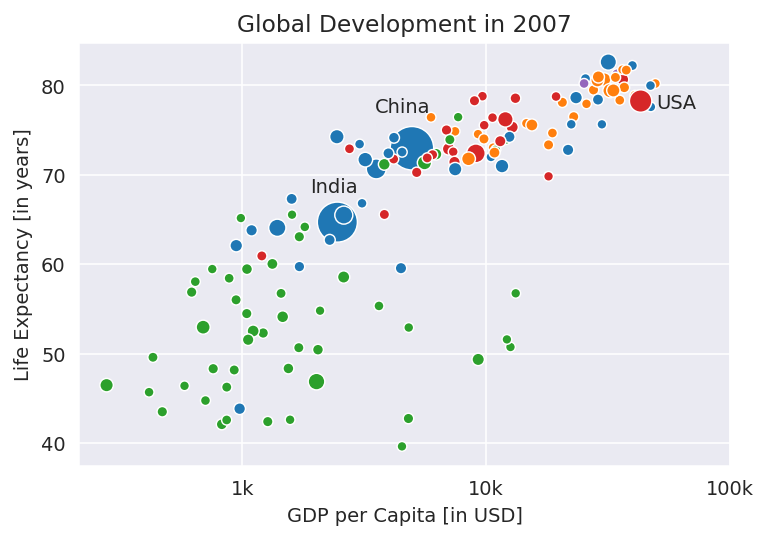

In [43]:
# Set array of population in millions to use for bubble size
pop = np.array(df.population) / 1000000

# As with the above plots, remember to set figure size before calling the plot. 
plt.figure(dpi=140)

# Build seaborn scatterplot, color coding by continent, setting bubble size by population, removing the clunky legend, and setting labels
sns.scatterplot(df["gdp_cap"], df["life_exp"], hue = df["continent"], size = pop, sizes = (25,500), legend=False)

# Format axis labels, scale, tick labels, and text for call-out countries. 
plt.xlabel("GDP per Capita [in USD]")
plt.ylabel("Life Expectancy [in years]")
plt.title("Global Development in 2007")
plt.xscale("log")
plt.xticks([1000, 10000, 100000], ["1k", "10k", "100k"])
plt.text(1900,68,"India")
plt.text(3500,77,"China")
plt.text(50000,77.5,"USA")
plt.show()